# Lecture 1 - Introduction to the Julia Programming Language

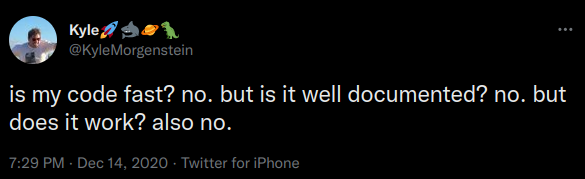


## Contents
1. [Julia - A Brief History](#julia-a-brief-history)
2. [Arrays](#arrays)
3. [Functions](#functions)
4. [Control Flow - Loops](#loops)
5. [Further Reading](#further-reading)
6. [Next Week](#next-week)

## 1. Julia - A Brief History <a class="anchor" id="julia-a-brief-history"></a>

### 2012: Julia was first introduced to the world in the now famous blogpost, [Why We Created Julia]().

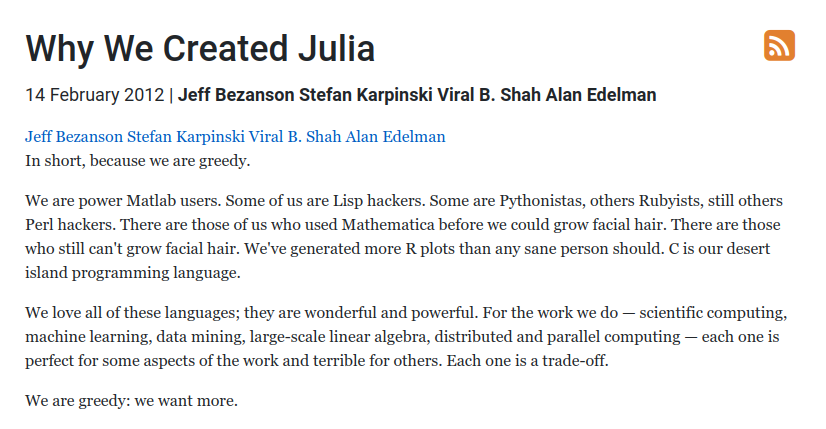

### 2017: Julia joined Fortran, C, and C++ in the [Petaflop Club](https://www.hpcwire.com/off-the-wire/julia-joins-petaflop-club/).

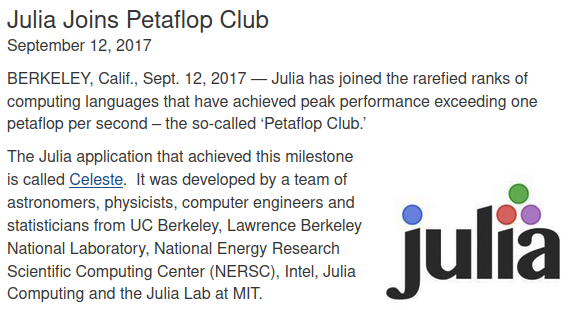

FLOP = floating point operation

In [3]:
1.1 + 2.0

3.1

In [4]:
using BenchmarkTools
@btime 1.1 + 2.0

  0.017 ns (0 allocations: 0 bytes)


3.1

### 2018: Julia version 1.0 released.
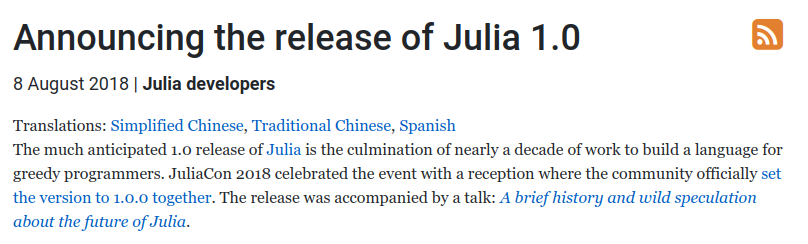

### 2022: Julia usage continues to grow rapidly (in many cases, exponentially)
- All [measures of adoption](https://juliacomputing.com/blog/2022/01/newsletter-january/) (Julia downloads, registered packages, GitHub stars, citations) are increasing year by year.
- In addition to the core Julia language, there are now state-of-the-art ecosystems for, amongst other things:
    - Scientific programming, e.g. [DifferentialEquations.jl](https://diffeq.sciml.ai/stable/), [ModelingToolkit.jl](https://mtk.sciml.ai/stable/)
    - Machine learning, e.g. [MLJ.jl](https://alan-turing-institute.github.io/MLJ.jl/dev/), [Flux.jl](https://fluxml.ai/Flux.jl/stable/), [Turing.jl](https://turing.ml/stable/)
    - Scientific machine learning (SciML), e.g. [DiffEqFlux.jl](https://diffeqflux.sciml.ai/dev/)
    - Plotting, e.g. [Makie.jl](https://makie.juliaplots.org/stable/)
- The next generation of climate models is being written in Julia: [CliMA](https://clima.caltech.edu/)

## 2. Arrays <a class="anchor" id="arrays"></a>
- Arrays are probably the most important data structure in scientific programming.

> **An array is an ordered, mutable collection of objects.**

- **Mutable**: it can be modified after it has been created.

In [5]:
a = rand(3)

3-element Vector{Float64}:
 0.20566975070698934
 0.4060301147798555
 0.2712128448835478

In [7]:
a[2] = 1.0;
a

3-element Vector{Float64}:
 0.20566975070698934
 1.0
 0.2712128448835478

- In general, the `Array` type in Julia may contain objects of arbitrary type:

In [8]:
[
    1.0,     # Float64 
    1,       # Int64
    true,    # Bool
    nothing, # Nothing
    () -> 1, # Function
]

5-element Vector{Any}:
    1.0
    1
 true
     nothing
     #1 (generic function with 1 method)

- **Don't do this!** In practice, arrays should always contain objects of the **same type**. 

In [9]:
[1.0, 2.0, 1]

3-element Vector{Float64}:
 1.0
 2.0
 1.0

- *Thought exercise*: why do you think this is important?

In [10]:
typeof(1.0)

Float64

- In Julia, arrays can have **arbitrary dimension**. You could think of an array as a finite n-dimensional grid, with an object placed at each gridpoint.

In [15]:
rand(3, 5)

3×5 Matrix{Float64}:
 0.306662  0.12724   0.993983  0.495537  0.931328
 0.212282  0.831249  0.724186  0.96169   0.896078
 0.637075  0.045509  0.435168  0.257126  0.583087

- Note: 
    - `Vector` is an alias for a one-dimensional `Array`.
    - `Matrix` is an alias for a two-dimensional `Array`.

In [20]:
a = rand(3);

a[1]
a[end]

0.1815261336700641

### 2.1. Constructing and Initialising Arrays
#### 2.1.1. Array Literals
- One-dimensional arrays (vectors) can be directly constructed using square brackets and comma-separated elements:

In [21]:
[1.0, 2.0, 3.0]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

- Elements separated by tabs or spaces are *horizontally concatenated*. This can be useful for creating matrix literals, for example:

In [22]:
[1.0 2.0 3.0]

1×3 Matrix{Float64}:
 1.0  2.0  3.0

In [23]:
a = [1, 2]; b = [4, 5]; c = [7, 8]  # vectors

[a b c]

2×3 Matrix{Int64}:
 1  4  7
 2  5  8

- Elements separated by semi-colons or newlines are *vertically concatenated*. This leads to some especially useful syntax for matrix literals:

In [24]:
[1 4 7
 2 5 8]

2×3 Matrix{Int64}:
 1  4  7
 2  5  8

#### 2.1.2. Some Useful Functions for Constructing Arrays
Full list [here](https://docs.julialang.org/en/v1/manual/arrays/#Construction-and-Initialization). In all of the following functions, `T` is the element type of the array. If the argument `T` is omitted, it defaults to `Float64`.

1. `zeros(T, dims...)` - an array of all zeroes.

In [26]:
zeros(3, 4)

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

2. `ones(T, dims...)` - an array of all ones.

3. `rand(T, dims...)` - an array with random, iid and uniformly distributed values in the half-open interval `[0, 1)`.

4. `randn(T, dims...)` - an array with random, iid and standard normally distributed values.

In [27]:
randn(4)

4-element Vector{Float64}:
 -0.5041872757625766
  2.1389740929708165
 -0.7150883563255754
  0.1711270630926773

5. `similar(A)` - create an uninitialized array with the same element type and size as the array `A`.

In [29]:
A = rand(3, 4);
B = similar(A)

3×4 Matrix{Float64}:
 6.92224e-310  6.92224e-310  6.92224e-310  6.92224e-310
 6.92224e-310  6.92224e-310  6.92224e-310  6.92224e-310
 6.92224e-310  6.92224e-310  6.92216e-310  6.92224e-310

6. `fill(x, dims...)` - return an array filled with the value `x`.

In [30]:
fill(π, 3, 4)

3×4 Matrix{Irrational{:π}}:
 π  π  π  π
 π  π  π  π
 π  π  π  π

7. `fill!(A, x)` - fill the array `A` with the value `x`.

In [33]:
A = rand(3, 4)

3×4 Matrix{Float64}:
 0.885185  0.840431  0.530297    0.45651
 0.976711  0.75972   0.00264691  0.462035
 0.341402  0.563584  0.27142     0.250954

In [34]:
B = fill!(A, 1.0)

3×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [35]:
A

3×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

**Note!** A function name ending with `!` indicates that the function modifies its arguments "in-place".

### 2.2. Array Indexing
- The general syntax for indexing into an n-dimensional array `A` is:

    `A[I_1, I_2, ..., I_n]`,

    where each `I_k` may be a scalar integer, an array of integers, or any other supported index (see the docs for other supported [indices](https://docs.julialang.org/en/v1/manual/arrays/#man-supported-index-types)).

In [41]:
A = rand(3, 4, 6);
A[2, 1, 2];
A[2, 1, [1,2]];
A[2, 1, 1:3]

3-element Vector{Float64}:
 0.6503648858596177
 0.011575200538976205
 0.9312407591520342

- **N.B. Arrays in Julia are 1-indexed, not 0-indexed!**

- The `end` keyword may be used to indicate the last index in a given dimension.

### 2.3. Indexed Assignment
- Remember, arrays are mutable!


- Similar to array indexing, the general syntax for assigning values in an n-dimensional array `A` is:

    `A[I_1, I_2, ..., I_n] = X`,

    where each `I_k` may be a scalar integer, an array of integers, or any other supported index.

In [45]:
A = rand(3, 4);
A[1, 2] = 2;
A

3×4 Matrix{Float64}:
 0.556031  2.0        0.0161592  0.678699
 0.8833    0.643639   0.301727   0.417212
 0.778287  0.0924221  0.497492   0.400558

- If any index `I_k` is itself an array, then the right hand side `X` must also be an array with the same shape as the result of indexing `A[I_1, I_2, ..., I_n]` or a vector with the same number of elements. 

In [49]:
A[1, [1,2]] = [3, 4]
A

3×4 Matrix{Float64}:
 3.0       4.0        0.0161592  0.678699
 0.8833    0.643639   0.301727   0.417212
 0.778287  0.0924221  0.497492   0.400558

- The element-wise assignment operator `.=` may be used to broadcast `X` across the selected locations:

    `A[I_1, I_2, ..., I_n] .= X`

In [54]:
A = rand(3, 4);
A[1, :] .= 1.0;
A

3×4 Matrix{Float64}:
 1.0       1.0       1.0       1.0
 0.502898  0.335128  0.877     0.708826
 0.661145  0.465391  0.402562  0.242895

### 2.4. Growing and Shrinking an Array
- Use `push!` to add an item to the end of a (one-dimensional) array. This extends the array.

In [75]:
#a = rand(3);
push!(a, 3.0)

16-element Vector{Float64}:
 0.7743450916336392
 0.9768926583459364
 0.4675611289935069
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0

- Use `pop!` to get an item from the end of a (one-dimensional) array. This shrinks the array.

In [93]:
pop!(a)

0.4675611289935069

In [94]:
a

2-element Vector{Float64}:
 0.7743450916336392
 0.9768926583459364

- *Thought exercise*: Why do we usually prefer adding items to and removing items from the *end* of an array? What happens if we add an item in the middle of an array?

## 3. Functions  <a class="anchor" id="functions"></a>
- Conceputal definition: A function maps inputs to a return value.

### 3.1. Defining Functions
#### 3.1.1. Basic Function Definition Syntax 

In [95]:
function f(x, y)
    x + y
end

f (generic function with 1 method)

#### 3.1.2. Compact "Assignment Form" Syntax

In [96]:
f(x, y) = x + y

f (generic function with 1 method)

### 3.2. Calling Functions
- Functions are called with the standard parenthesis syntax.

In [97]:
f(1, 2)

3

### 3.3. Returning from Functions
- By default, a function will return the value of the last expression evaluated.

In [98]:
function f(x, y, z)
    a = x + y
    a + z  # this is the last expression in my function
end

f (generic function with 2 methods)

In [99]:
f(1, 2, 3)

6

- Alternatively, a value can be returned explicitly using the `return` keyword.

In [100]:
function f(x, y, z)
    return a = x + y
    a + z  # this code is unreachable
end

f (generic function with 2 methods)

In [101]:
f(1, 2, 3)

3

- This is useful, for example, when some control flow exists in your function and the desired logic depends on the values of the inputs. In such a case, you can control the behaviour of the function with the `return` keyword.

In [102]:
function my_dumb_operator(a, b, operation)
    if operation == :add
        return a + b
    elseif operation == :subtract
        return a - b
    else
        error("operation must be either :add or :subtract")
    end
    println("This code is unreachable!")
end

my_dumb_operator (generic function with 1 method)

In [104]:
my_dumb_operator(1, 2, :subtract)

-1

- Many functions do not return anything (for example, if they do file I/O, or if they modify their arguments in-place). In this case, the Julia convention is to explicitly `return nothing`.

In [105]:
function say_hello()
    println("Hello, world!")
    return nothing  # make this explicit
end

say_hello (generic function with 1 method)

In [106]:
say_hello()

Hello, world!


- Multiple values can also be returned from a function:

In [111]:
function return_self_and_square(x)
    return x, x * x  # each value to be returned is separated by a comma
end

return_self_and_square (generic function with 1 method)

In [112]:
x, x_squared = return_self_and_square(2)

(2, 4)

In [114]:
typeof(return_self_and_square(2)) # more on tuples later

Tuple{Int64, Int64}

### 3.5. Functions with Default Arguments
- Function arguments can be given default values using the assignment operator `=` in the function signature.

- Arguments with defaults are **optional** - they do not have to be included when calling the function.

In [115]:
function calculate_pay_with_bonus(hours, rate, bonus = 0.0)
   return hours * rate + bonus
end

calculate_pay_with_bonus (generic function with 2 methods)

In [117]:
calculate_pay_with_bonus(10, 15, 100)

250

### 3.6. Functions with Keyword Arguments
- All of the functions we've seen so far have *positional* arguments; the arguments are passed into the function in the same order as they appear in the function definition.

- Keyword arguments are passed by *name* rather than position.

- Keyword arguments can be passed in any order.

- This can be useful for large and complicated functions, and makes your code more readable.

- When defining a function, **keyword arguments are separated from positional arguments by a semi-colon**.

In [118]:
function calculate_pay_with_bonus(hours, rate; bonus = 0.0)
   return hours * rate + bonus
end

calculate_pay_with_bonus (generic function with 2 methods)

In [119]:
calculate_pay_with_bonus(10, 15, bonus = 100)

250

In [120]:
function calculate_pay_with_bonus_and_tip(hours, rate; bonus = 0.0, tip = 0.0)
   return hours * rate + bonus + tip
end

calculate_pay_with_bonus_and_tip (generic function with 1 method)

In [122]:
calculate_pay_with_bonus_and_tip(10, 15, bonus = 0, tip = 0)

150

## 4. Control Flow - Loops <a class="anchor" id="loops"></a>
- Often we want to repeat some algorithmic procedure a number of times, e.g. until some condition is satisfied or over a range of input values. This is typically achieved using a loop construct.

### 4.1. The `while` Loop
- The most general loop construct in Julia is the `while` loop, which takes the form:

    ```julia
    while <condition>
        # do something
    end
    ```
- The boolean condition expression is evaluated at the beginning of every iteration; as long as it evaluates to `true`, the loop body is executed. As soon as the condition expression evaluates to `false`, the loop is terminated.

In [123]:
i = 1
while i <= 5
    println(i)
    i += 1
end

1
2
3
4
5


### 4.2. The `for` Loop
- The `for` loop simplifies the most common iteration use cases. 

In [124]:
for i = 1:5
    println(i)
end

1
2
3
4
5


- In general, the `for` loop can iterate over any container (e.g. `Array`, `Tuple`), not just a range object. In that case, the equivalent `in` keyword is typically used:

In [125]:
for i in [1, 2, 3, 4, 5]
    println(i)
end

1
2
3
4
5


In [127]:
struct Cat
    name
    greeting
    face
    end # like a Python Class, more on this later
tom = Cat("Tom", "meow", "🐱")
leo = Cat("Leo", "rawr", "🦁")
cats = [tom, leo]

2-element Vector{Cat}:
 Cat("Tom", "meow", "🐱")
 Cat("Leo", "rawr", "🦁")

In [129]:
for cat in cats
    println(cat.name, " says ", cat.greeting, cat.face)
end

Tom says meow🐱
Leo says rawr🦁


### 4.3. Early Stopping: The `break` keyword
- A loop can be terminated immediately using the `break` keyword.

In [130]:
for i = 1:5
    println(i)
    if i == 3
        break
    end
end

1
2
3


### 4.4. Jumping Ahead: The `continue` keyword
- All or part of the loop body can be skipped using the `continue` keyword. The next iteration will then be started immediately.

In [131]:
for i = 1:10
   if i % 3 != 0
       continue
   end
   println(i)
end

3
6
9


### 4.5. The `Range` Object
- We've been using ranges, e.g. `1:10`, frequently. This is a very useful construct for generating sequences of numbers and takes the general form:

    ```julia
    a:b:c
    ```

    where `a` is the starting number, `c` is the ending number, and `b` is the stepsize. By default `b = 1`.
    

- Note the difference with Python - ranges are inclusive.
    
    
- How could we simplify the previous loop using an appropriate `Range` object?

In [139]:
for i = 3:3:10
    println(i)
end

3
6
9


In [132]:
typeof(1:10)

UnitRange{Int64}

- **Tip**: Convert a range object into an `Array` using `collect`.

In [136]:
collect(1:3)

3-element Vector{Int64}:
 1
 2
 3

- **Tip**: `Range` objects can also be used in `Array` indexing.

In [138]:
a = rand(3,4);
a[1, 1:2]  # inclusive

2-element Vector{Float64}:
 0.8819883268022319
 0.7480970190741785

### 4.6. Nested Loops
- Loops can be nested arbitrarily:

In [142]:
for i = 1:2  # outer loop
    for j = 3:4  # inner loop
        println((i, j))  # Cartesian product of 1:2 and 3:4
        break  # breaks innermost enclosing loop
    end
end

(1, 3)
(2, 3)


- In Julia, multiple nested loops can be combined into a single outer loop:

In [143]:
for i = 1:2, j = 3:4
    println((i, j))
    break
end

(1, 3)


- Are the two forms of the nested loop equivalent?

## 5. Further Reading <a class="anchor" id="further-reading"></a>
- These notes draw heavily on the official Julia [documentation](https://docs.julialang.org/en/v1/). For more information see the sections on:
    - [Multi-dimensional Arrays](https://docs.julialang.org/en/v1/manual/arrays/)
    - [Functions](https://docs.julialang.org/en/v1/manual/functions/)
    - [Control Flow](https://docs.julialang.org/en/v1/manual/control-flow/)

## 6. Next Week <a class="anchor" id="next-week"></a>
1. More Julia.
2. Git and GitHub.